# Social Media Engagement Analysis
## Objectives
To analyze platform performance, content type effectiveness, and sentiment impact on engagement metrics in order to provide strategic recommendations.
## Dataset Overview  
The dataset includes post-level engagement metrics (likes, comments, shares), platform type, content format, posting time, and sentiment classification.

In [1]:
import pandas as pd
df = pd.read_csv("social_media_engagement1.csv")
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [2]:
df.describe() #numeric summary(likes, comments, shares)
df['platform'].value_counts() #how many posts per platform
df['post_type'].value_counts() #how many posts per type


post_type
carousel    26
video       23
text        21
image       17
poll        13
Name: count, dtype: int64

In [4]:
df['total_engagement'] = df['likes'] + df['comments'] + df['shares']
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,total_engagement
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive,3223
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral,4786
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative,6051
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative,1460
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive,4032


In [5]:
df.groupby('platform')['total_engagement'].mean().sort_values(ascending=False)

platform
Instagram    3757.444444
Facebook     3423.031250
Twitter      1725.218750
Name: total_engagement, dtype: float64

In [6]:
df.groupby('post_type')['total_engagement'].mean().sort_values(ascending=False)

post_type
poll        3746.384615
video       3542.782609
carousel    3030.730769
image       2601.470588
text        2228.619048
Name: total_engagement, dtype: float64

In [7]:
df.groupby('sentiment_score')['total_engagement'].mean().sort_values(ascending=False)

sentiment_score
negative    3598.592593
positive    3017.978261
neutral     2371.222222
Name: total_engagement, dtype: float64

In [8]:
df.groupby(['platform', 'post_type'])['total_engagement'].mean().sort_values(ascending=False)

platform   post_type
Facebook   poll         4985.333333
Instagram  video        4862.285714
           poll         4325.166667
           image        4160.000000
Facebook   video        4092.444444
Instagram  carousel     3316.777778
Facebook   carousel     3158.000000
           text         3117.166667
Twitter    carousel     2481.142857
Instagram  text         2330.000000
Twitter    poll         1949.000000
Facebook   image        1866.500000
Twitter    video        1516.571429
           text         1473.500000
           image        1273.166667
Name: total_engagement, dtype: float64

## Strategic Recommendation
Based on the engagement analysis:
- Facebook polls generate the highest engagement and should be prioritized.
- Instagram video content performs exceptionally well and should be increased.
- Interactive formats outperform static text posts.
- Emotionally strong content tends to drive higher engagement.
- Twitter shows lower engagement and may require strategy revision.

## Business Conclusion

Based on the analysis:

- Instagram and Facebook outperform Twitter in average engagement.
- Polls and videos generate the highest interaction.
- Negative sentiment posts show high engagement, suggesting emotional content drives interaction.
- Interactive content formats should be prioritized.

Future Improvements:
- Build a predictive model to forecast engagement.
- Create visualizations for stakeholder presentations.
- Test optimal posting times.

Matplotlib is building the font cache; this may take a moment.


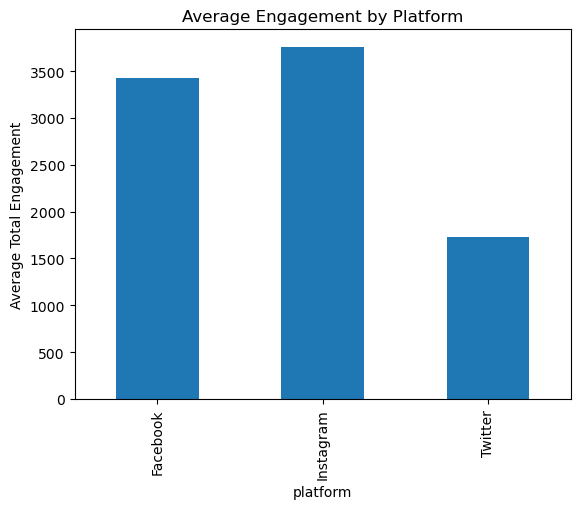

In [12]:
import matplotlib.pyplot as plt

platform_engagement = df.groupby('platform')['total_engagement'].mean()

platform_engagement.plot(kind='bar')
plt.title("Average Engagement by Platform")
plt.ylabel("Average Total Engagement")
plt.show()